In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 

In [2]:
df=pd.read_csv('E:/NTI/car_data.csv')
print(df.shape)
df.head()

(1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [4]:
df = df.drop(['Gender', 'User ID'], axis=1)

In [5]:
X=df.iloc[:,0:2]
X

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000
...,...,...
995,38,59000
996,47,23500
997,28,138500
998,48,134000


In [6]:
y=df.iloc[:,2]
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=81)

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
import pandas as pd
X_test = pd.DataFrame(X_test, columns=["Age", "AnnualSalary"])


In [44]:
C=1000
clf=SVC(C=C,kernel="linear")
clf.fit(X_train,y_train)

SVC(C=1000, kernel='linear')

In [10]:
y_pred=clf.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
accuracy_score(y_test,y_pred)

0.836

In [12]:
y_pred_dec=clf.decision_function(X_test)
y_pred_dec[0:10]

array([ 0.91674264, -0.43914389, -0.87417221,  0.37811955, -0.27610874,
       -0.53162804,  1.06529558, -3.16501505, -1.01517818, -1.74532072])

In [13]:
y_pred_sign=np.sign(y_pred_dec)
y_pred_sign[0:10]

array([ 1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.])

In [14]:
y_pred1=[0 if l==-1 else 1 for l in y_pred_sign]
y_pred1[0:10]

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


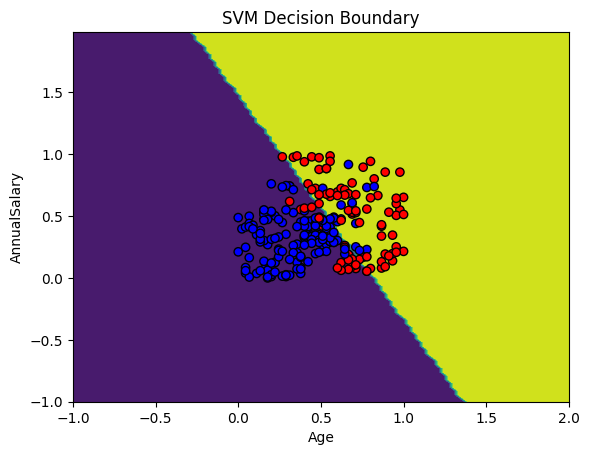

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# عرض حدود القرار
DecisionBoundaryDisplay.from_estimator(
    clf, X_test,
    response_method="predict",
    xlabel="Age",
    ylabel="AnnualSalary"
)

# عرض نقاط الاختبار
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.title("SVM Decision Boundary")
plt.show()


In [ ]:
w=clf.coef_

In [ ]:
b = clf.intercept_

In [45]:
w = clf.coef_[0]        # استخراج w1, w2
b = clf.intercept_[0]   # استخراج b


In [46]:
# استخراج المعاملات
w = clf.coef_[0]
b = clf.intercept_[0]

# إنشاء نقاط x على المحور الأفقي
x_vals = np.linspace(X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max(), 100)

# معادلة خط القرار
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]

# حساب وحدة الاتجاه العمودي على w
norm = np.linalg.norm(w)
unit_w = w / norm
orthogonal = np.array([-unit_w[1], unit_w[0]])  # عمودي على w

# قيمة المارجن
margin = 1 / norm

# إزاحة الخط العلوي والسفلي في الاتجاه العمودي
y_margin_up = y_vals + orthogonal[1] * margin
y_margin_down = y_vals - orthogonal[1] * margin

 

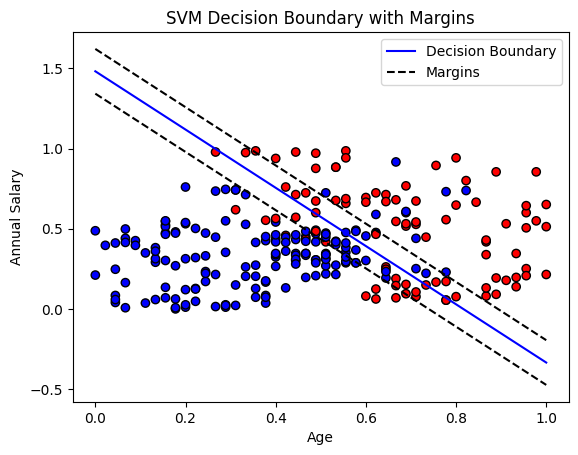

In [27]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.plot(x_vals, y_vals, 'b-', label='Decision Boundary')
plt.plot(x_vals, y_margin_up, 'k--', label='Margins')
plt.plot(x_vals, y_margin_down, 'k--')
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.title("SVM Decision Boundary with Margins")
plt.legend()
plt.show()


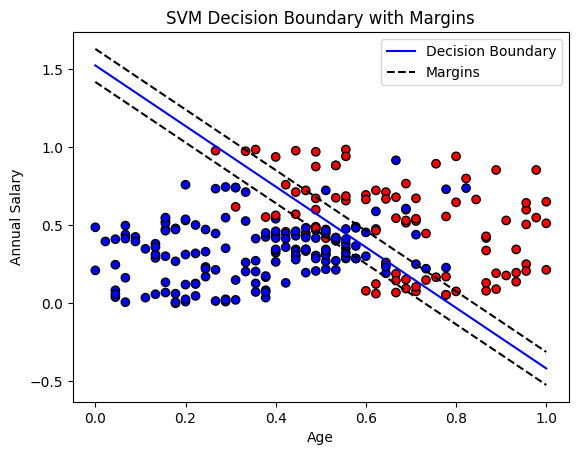

In [47]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.plot(x_vals, y_vals, 'b-', label='Decision Boundary')
plt.plot(x_vals, y_margin_up, 'k--', label='Margins')
plt.plot(x_vals, y_margin_down, 'k--')
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.title("SVM Decision Boundary with Margins")
plt.legend()
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# استخراج المعاملات
w = clf.coef_[0]
b = clf.intercept_[0]

# رسم البيانات
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='bwr', edgecolors='k')

# نقاط X على المحور الأفقي
x_vals = np.linspace(X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max(), 100)

# معادلة الخط الفاصل
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]

# حساب وحدة الاتجاه العمودي على w
norm = np.linalg.norm(w)
unit_w = w / norm
orthogonal = np.array([-unit_w[1], unit_w[0]])  # عمودي على w

# حساب المارجن
margin = 1 / norm

# حساب خطوط الهوامش العلوية والسفلية
y_margin_up = y_vals + orthogonal[1] * margin
y_margin_down = y_vals - orthogonal[1] * margin

# الرسم
plt.plot(x_vals, y_vals, 'b-', label='Decision Boundary')
plt.plot(x_vals, y_margin_up, 'k--', label='Margin')
plt.plot(x_vals, y_margin_down, 'k--')

# دعم بالرسم
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.title("SVM Decision Boundary with Margins")
plt.legend()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
y_pred2=np.dot(X_test,w.T)+b
y_pred2[0:10]

In [ ]:
y_pred3=[0 if l<-1 else 1 for l in y_pred2]
y_pred3[0:10]

In [ ]:
# plt.scatter(X_test[:,0][y_test==0], X_test[:,1][y_test==0], label="0",  c='green')
# plt.scatter(X_test[:,0][y_test==1], X_test[:,1][y_test==1], label="1",  c='red')
 
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
 
 
for  j in np.unique(y):
 plt.scatter(X_test[:,0][y_test==j], X_test[:,1][y_test== j], label=j)
 
x_points = X_test[:,0]
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
plt.plot(x_points, y_points, c='blue');
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.ylim(-3,3)
plt.legend()
plt.show()
 

In [ ]:
# لو y_test و X_test من نوع DataFrame أو Series، الأفضل التأكد من تطابق الفهارس
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# رسم النقاط لكل فئة في y
for j in np.unique(y_test):
    plt.scatter(X_test.iloc[y_test == j, 0], X_test.iloc[y_test == j, 1], label=str(j))

# رسم خط الفصل
x_points = X_test.iloc[:, 0]
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='blue')

# إعدادات الرسم
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.ylim(-3, 3)
plt.legend()
plt.show()


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(  clf, X_test, response_method="predict",xlabel=df.columns[2], ylabel=df.columns[3])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
# plt.xlabel(df.columns[2])
# plt.ylabel(df.columns[3])
# plt.ylim(-3,3)
plt.legend()
plt.show()
 